<a href="https://colab.research.google.com/github/anujavenkatachalam04/chvi_vbd_rj/blob/main/notebooks/calc_pop_density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculate Population Density from Shapefile

In [ ]:
# # import dependencies
# !pip install -r https://raw.githubusercontent.com/anujavenkatachalam04/chvi_vbd_rj/main/requirements.txt

In [ ]:
import os
import pandas as pd
import geopandas as gpd
import requests
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
import geopandas as gpd
from shapely.geometry import Point
import uuid


Mounted at /content/drive


In [2]:
os.chdir("/content/drive/MyDrive/CHVI")

In [3]:
# Import shapefile
blocks_shp=gpd.read_file("5_Shapefiles/SUBDISTRICT_11/Rajasthan_Blocks.shp")

In [4]:
# Change crs to meters
# Reproject to a projected CRS in meters
# India-specific choice: EPSG:7755 (India_TM)
gdf = blocks_shp.to_crs(epsg=7755)

# Calculate area in square kilometers
gdf["area_km2"] = gdf.geometry.area / 1e6  # convert from m² to km²

# Calculate population density (total population per km²)
gdf["pop_density"] = gdf["TOT_POP"] / gdf["area_km2"]

In [10]:
gdf["area_km2"].describe()

,area_km2
count,244.000000
mean,1352.295939
std,1834.684763
min,307.648007
25%,657.074716
50%,924.937473
75%,1361.607367
max,23642.631121


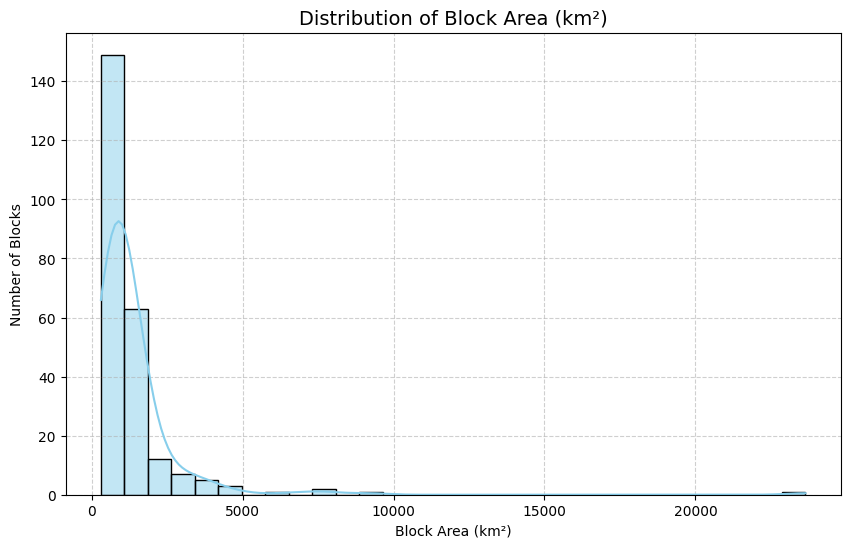

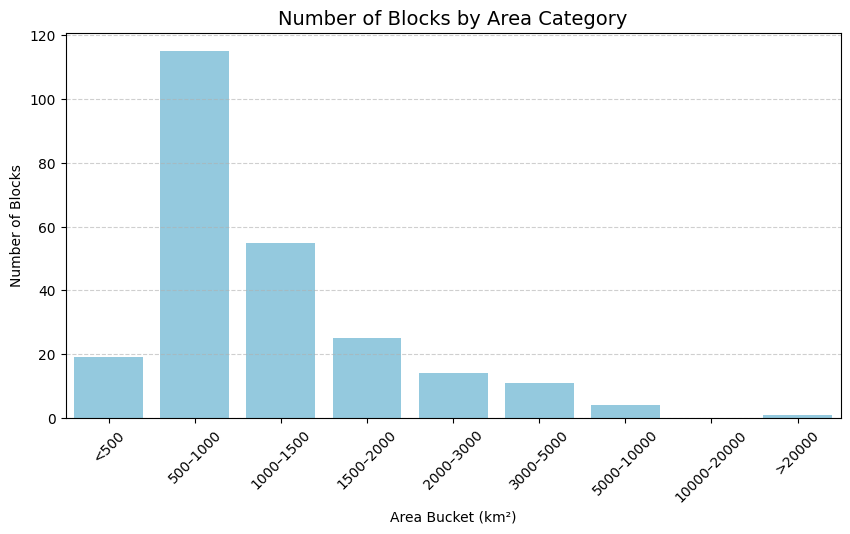

area_bucket
<500            19
500–1000       115
1000–1500       55
1500–2000       25
2000–3000       14
3000–5000       11
5000–10000       4
10000–20000      0
>20000           1
Name: count, dtype: int64


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create buckets for visualization
bins = [0, 500, 1000, 1500, 2000, 3000, 5000, 10000, 20000, 25000]
labels = ['<500', '500–1000', '1000–1500', '1500–2000', '2000–3000',
          '3000–5000', '5000–10000', '10000–20000', '>20000']
gdf['area_bucket'] = pd.cut(gdf['area_km2'], bins=bins, labels=labels, include_lowest=True)

# Count how many blocks fall into each bucket
bucket_counts = gdf['area_bucket'].value_counts().sort_index()

# --- Plot 1: Histogram (continuous) ---
plt.figure(figsize=(10, 6))
sns.histplot(gdf['area_km2'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Block Area (km²)', fontsize=14)
plt.xlabel('Block Area (km²)')
plt.ylabel('Number of Blocks')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- Plot 2: Bar chart (binned) ---
plt.figure(figsize=(10, 5))
sns.barplot(x=bucket_counts.index, y=bucket_counts.values, color='skyblue')
plt.title('Number of Blocks by Area Category', fontsize=14)
plt.xlabel('Area Bucket (km²)')
plt.ylabel('Number of Blocks')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# --- Optional: Display summary table ---
print(bucket_counts)


In [28]:
# Pop density
gdf["pop_density"].describe()

,pop_density
count,244.000000
mean,295.864912
std,308.099183
min,11.218591
25%,173.746891
50%,225.773652
75%,353.445848
max,4214.520460


/tmp/ipython-input-878901688.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pop_bucket_counts.index, y=pop_bucket_counts.values, palette='viridis')


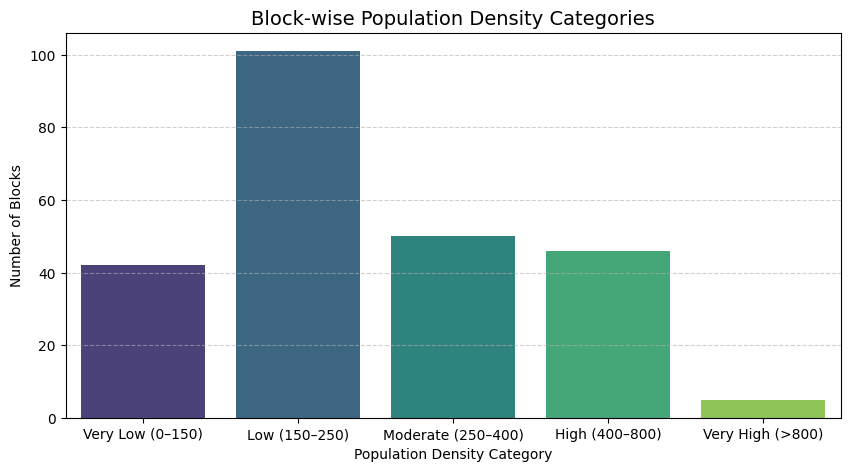

,count
pop_density_bucket,
Very Low (0–150),42
Low (150–250),101
Moderate (250–400),50
High (400–800),46
Very High (>800),5


In [38]:
bins = [0, 150, 250, 400, 800, gdf['pop_density'].max()]
labels = ['Very Low (0–150)',
          'Low (150–250)',
          'Moderate (250–400)',
          'High (400–800)',
          f'Very High (>800)']

gdf['pop_density_bucket'] = pd.cut(gdf['pop_density'], bins=bins, labels=labels, include_lowest=True)

# Count blocks in each bucket
pop_bucket_counts = gdf['pop_density_bucket'].value_counts().sort_index()

# --- Plot ---
plt.figure(figsize=(10, 5))
sns.barplot(x=pop_bucket_counts.index, y=pop_bucket_counts.values, palette='viridis')
plt.title('Block-wise Population Density Categories', fontsize=14)
plt.xlabel('Population Density Category')
plt.ylabel('Number of Blocks')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
pop_bucket_counts


In [40]:
gdf.drop(columns=["geometry"]).to_csv("1_Data/SED/census2011_sed.csv", index=False)

In [ ]:
# The End!